# Reinforced Random Walk
___

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

%matplotlib inline
%load_ext autoreload
%autoreload 1
%config InlineBackend.figure_formats = {'png', 'retina'}

## Pólya's urn

An urn initially contains $a$ red and $b$ blue balls. You pick up one of the balls randomly and if the ball is red, you return $1+c$ red balls, otherwise you return $1+c$ blue balls to the urn. You repeat this process.

> **Theorem**  
> Let S_n be the number of red balls in the urn after $n$ steps. Then,
> $$P(S_n = k) \, =  \, \int_0^1 \binom{n}{k}x^k(1-x)^{n-k} \frac{x^{a/c - 1} (1-x)^{b/c - 1}}{B(a/c, b/c)} \, dx.$$
> In particuler, if $a = b = c = 1$, $P(S_n = k) = 1 / (n+1). $ 

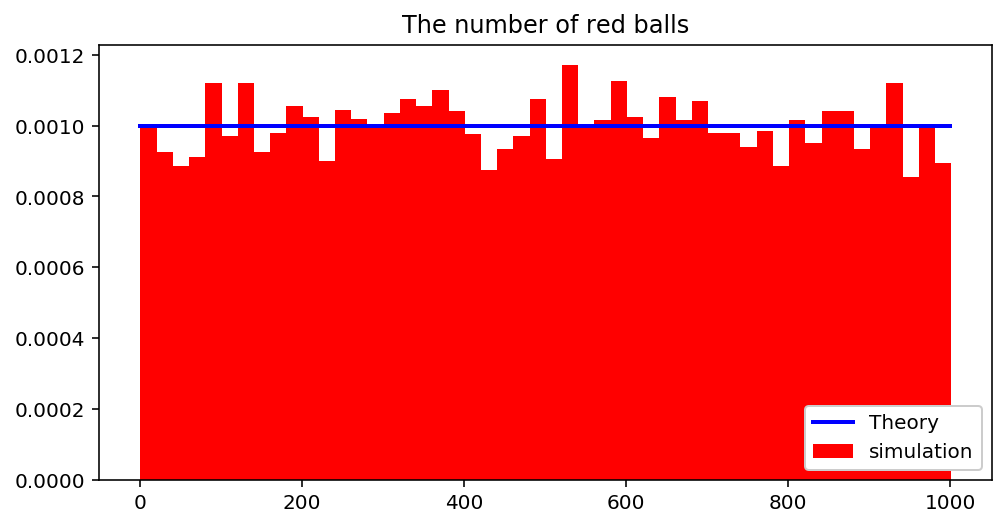

CPU times: user 32.9 s, sys: 141 ms, total: 33.1 s
Wall time: 33.3 s


In [2]:
%%time
step = 1000
num = 10000

RED = 1
BLUE = -1

end_reds = []

for _ in range(num):
    red = 1
    blue = 1
    for _ in range(step):
        ball = random.choices((RED, BLUE), weights=(red, blue))[0]
        if ball == RED:
            red += 1
        else:
            blue += 1
    end_reds.append(red)

plt.figure(figsize=(8, 4))
plt.hist(end_reds, bins=50, density=True, color='r', label='simulation')
plt.plot([0, 1000], [1/(step+1)]*2, color='b', linewidth=2, label='Theory')
plt.title('The number of red balls')
plt.legend(loc='lower right', framealpha=1)
plt.show()

## Reinforced Random Walk
Let $w_n(k)$ is the weight of the "road" $[k, k+1]$. If the process go through the road, the weight increases $\Delta$. 
$$P( X(n+1) = X(n) + 1 | X(0), \dots ,X(n) ) = \frac{w_n(X(n))}{w_n(X(n)-1) +w_n(X(n))}. $$

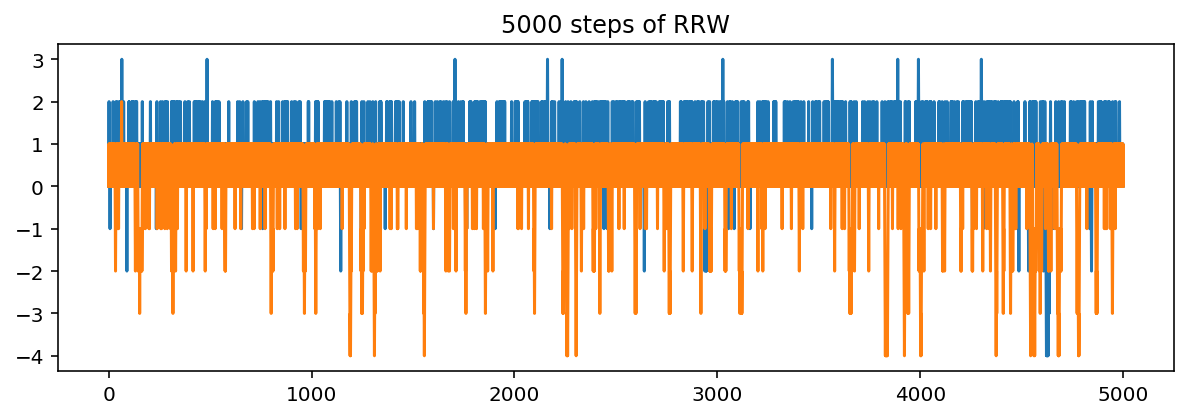

CPU times: user 578 ms, sys: 78.1 ms, total: 656 ms
Wall time: 687 ms


In [3]:
%%time
step = 5000
num = 2
delta = 1

plt.figure(figsize=(10, 3))
for _ in range(num):
    weigh = [1] * (2*step + 2)
    x = 0
    process = [x]
    for _ in range(step):
        s = random.choices((-1, 1), weights=(weigh[x+(step+1)-1], weigh[x+(step+1)]))[0]
        if s == 1:
            weigh[x+(step+1)] += delta
        else:
            weigh[x+(step+1)-1] += delta
        x += s
        process.append(x)
    plt.plot(process)

plt.title(f'{step} steps of RRW')
plt.show()

A reinforced random walk is positive-recurrent (cf. A simple random walk is null-recurrent).

### Limitation behavior
If $\Delta = 1$,
$$\limsup_{n \to \infty} \frac{X(n)}{\log_4 n} = 1 \, \, \, a.s.$$
(Compare with simple random walk!!)